In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import sys, os, time, csv, glob, cv2

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Settings
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision = 5, suppress = True)

Using plaidml.keras.backend backend.


In [160]:
train_normal = []
train_attack = []
test_normal = []
test_attack = []

for i in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/80-20/train_normal/train_normal_equ_*.jpg', recursive=True):
    train_normal.append(cv2.imread(i, cv2.IMREAD_GRAYSCALE))

for j in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/80-20/train_attack/train_attack_equ_*.jpg', recursive=True):
    train_attack.append(cv2.imread(j, cv2.IMREAD_GRAYSCALE))

for k in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/80-20/test_normal/test_normal_equ_*.jpg', recursive=True):
    test_normal.append(cv2.imread(k, cv2.IMREAD_GRAYSCALE))

for l in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/80-20/test_attack/test_attack_equ_*.jpg', recursive=True):
    test_attack.append(cv2.imread(l, cv2.IMREAD_GRAYSCALE))

train_normal = np.array(train_normal)
train_attack = np.array(train_attack)
test_normal = np.array(test_normal)
test_attack = np.array(test_attack)

In [161]:
np.shape(train_normal), np.shape(train_attack), np.shape(test_normal), np.shape(test_attack)

# for i in range(0, 2):
#   plt.imshow(train_normal[i], cmap = 'gray')
#   plt.show()

# for i in train_normal:
#   print(i)


## MORE NORMAL DATA FOR TESTING TO GET SAME RATIO

((1714, 64, 64), (1576, 64, 64), (429, 64, 64), (394, 64, 64))

In [42]:
pxl_tot = []

for i in range(0, train_normal.shape[0]):
    pxl_avg = train_normal[i].sum() / 4096
    pxl_tot.append(pxl_avg)
#     print(f'Image {i}: {pxl_avg}')
    print(sum(pxl_tot)/4096)
    
#     if train_normal[i].sum() / 255 <= 3125:
#         plt.imshow(train_normal[i], cmap = 'gray')
#         plt.show()

0.0
0.007595360279083252
0.017653226852416992
0.017653226852416992
0.02733004093170166
0.03188812732696533
0.035903334617614746
0.03623616695404053
0.03623616695404053
0.03623616695404053
0.03623616695404053
0.03986382484436035
0.03986382484436035
0.03986382484436035
0.043467044830322266
0.057481348514556885
0.07855194807052612
0.10323619842529297
0.12834936380386353
0.14957726001739502
0.14957726001739502
0.17223811149597168
0.17223811149597168
0.17223811149597168
0.18045538663864136
0.18072086572647095
0.18072086572647095
0.18375259637832642
0.20004719495773315
0.21002399921417236
0.21002399921417236
0.23242849111557007
0.2473207712173462
0.25051796436309814
0.2525026798248291
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.2665230631828308
0.266523

In [43]:
sum(pxl_tot)/4096

12.11366868019104

In [162]:
train_transition = []
test_transition = []

for i in range(0, train_attack.shape[0]):
    if train_attack[i].sum() / 4096 < 6:
        train_transition.append(train_attack[i])

for j in range(0, train_normal.shape[0]):
    if train_normal[j].sum() / 4096 < 6:
        train_transition.append(train_normal[j])

for k in range(0, test_attack.shape[0]):
    if test_attack[k].sum() / 4096 < 6:
        test_transition.append(test_attack[k])
        
for l in range(0, test_normal.shape[0]):
    if test_normal[l].sum() / 4096 < 6:
        test_transition.append(test_normal[l])

In [163]:
train_transition = np.array(train_transition)
test_transition = np.array(test_transition)
train_transition.shape, test_transition.shape

((1295, 64, 64), (307, 64, 64))

In [4]:
## augmenting the data to create more images
## only run cell if needed

## vertically flip training images
vert_flip_train_attack = np.fliplr(train_attack)
vert_flip_train_normal = np.fliplr(train_normal)

## flip training images horizonatally
hor_flip_train_attack = np.rot90(train_attack, axes = (1,2), k = 2)
hor_flip_train_normal = np.rot90(train_normal, axes = (1,2), k = 2)

## rotate training images left and right once each
rotate90l_train_attack = np.rot90(train_attack, axes=(1, 2))
rotate90r_train_attack = np.rot90(train_normal, -1, axes=(1, 2))
rotate90l_train_normal = np.rot90(train_attack, axes=(1, 2))
rotate90r_train_normal = np.rot90(train_normal, -1, axes=(1, 2))



## vertically flip testing images
vert_flip_test_attack = np.fliplr(test_attack)
vert_flip_test_normal = np.fliplr(test_normal)

## flip testing images horizonatally
hor_flip_test_attack = np.rot90(test_attack, axes = (1,2), k = 2)
hor_flip_test_normal = np.rot90(test_normal, axes = (1,2), k = 2)

## rotate testing images left and right once each
rotate90l_test_attack = np.rot90(test_attack, axes=(1, 2))
rotate90r_test_attack = np.rot90(test_normal, -1, axes=(1, 2))
rotate90l_test_normal = np.rot90(test_attack, axes=(1, 2))
rotate90r_test_normal = np.rot90(test_normal, axes=(1, 2))


## stack all the original and augmented data to one single numpy array
train = np.vstack((train_attack, vert_flip_train_attack, hor_flip_train_attack, rotate90l_train_attack, rotate90r_train_attack,
                   train_normal, vert_flip_train_normal, hor_flip_train_normal, rotate90l_train_normal, rotate90r_train_normal))
test = np.vstack((test_attack, vert_flip_test_attack, hor_flip_test_attack, rotate90l_test_attack, rotate90r_test_attack,
                  test_normal, vert_flip_test_normal, hor_flip_test_normal, rotate90l_test_normal, rotate90r_test_normal))

## without rotate data
# train = np.vstack((train_attack, vert_flip_train_attack, hor_flip_train_attack,
#                    train_normal, vert_flip_train_normal, hor_flip_train_normal))
# test = np.vstack((test_attack, vert_flip_test_attack, hor_flip_test_attack,
#                   test_normal, vert_flip_test_normal, hor_flip_test_normal, rotate90l_test_normal, rotate90r_test_normal))                  

In [164]:
## if no augmented data is needed, run this cell
train = np.vstack((train_attack, train_normal, train_transition))
test = np.vstack((test_attack, test_normal, test_transition))

train.shape, test.shape

((4585, 64, 64), (1130, 64, 64))

In [165]:
train = train.reshape(-1,64,64,1)
test = test.reshape(-1,64,64,1)
transition = transition.reshape(-1,64,64,1)

train.shape, test.shape

((4585, 64, 64, 1), (1130, 64, 64, 1))

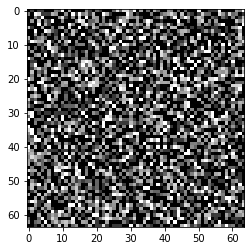

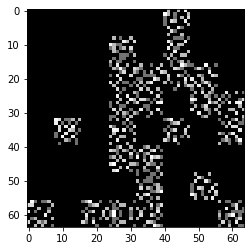

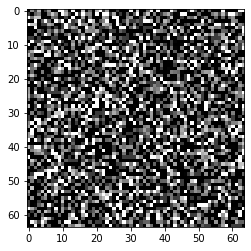

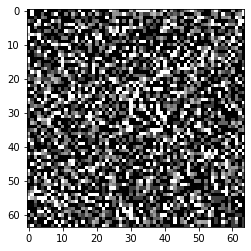

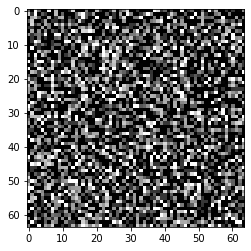

In [102]:
for i in range(0, 5):
    plt.imshow(train[i], cmap = 'gray')
    plt.show()

In [ ]:
print(f'Number of training images: {train.shape[0]}\nNumber of testing images {test.shape[0]}\n')
print(f'Number of training attack: {train_attack.shape[0]}\nNumber of vert flip train attack: {vert_flip_train_attack.shape[0]}\nNumber of training normal: {train_normal.shape[0]}\nNumber of vert flip training normal: {vert_flip_train_normal.shape[0]}\n')

print(f'Number of testing attack: {test_attack.shape[0]}\nNumber of vert flip test attack: {vert_flip_test_attack.shape[0]}\nNumber of hor flip test attack: {hor_flip_test_attack.shape[0]}\nNumber of test normal: {test_normal.shape[0]}\nNumber of vert flip test normal: {vert_flip_test_normal.shape[0]}\n' +
    f'Number of hor flip test normal: {hor_flip_test_normal.shape[0]}\nNumber of rotate90 left test normal: {rotate90l_test_normal.shape[0]}\nNumber of rotate90 right test normal: {rotate90r_test_normal.shape[0]}')

In [166]:
## create the training and testing data labels
## run if not using augmented data

training_labels = []
## add the attack labels
for i in range(0, train_attack.shape[0]):
    training_labels.append('attack')

## add the normal labels
for j in range(train_attack.shape[0], train.shape[0]):
    training_labels.append('normal')



testing_labels = []
## add the attack labels
for k in range(0, test_attack.shape[0]):
    testing_labels.append('attack')

## add the normal labels
for l in range(test_attack.shape[0], test.shape[0]):
    testing_labels.append('normal')



train_transition_labels = []
## add the transition labels
for m in range(0, train_transition.shape[0]):
    train_transition_labels.append('transition')

test_transition_labels = []
for n in range(0, test_transition.shape[0]):
    test_transition_labels.append('transition')

In [6]:
## create the training and testing data labels
## run this cell if using augmented data

training_labels = []
## add the attack labels
for i in range(0, train_attack.shape[0] + vert_flip_train_attack.shape[0] + hor_flip_train_attack.shape[0] + rotate90l_train_attack.shape[0] + rotate90r_train_attack.shape[0]):
    training_labels.append('attack')

## add the normal labels
for j in range(train_attack.shape[0] + vert_flip_train_attack.shape[0] + hor_flip_train_attack.shape[0] + rotate90l_train_attack.shape[0] + rotate90r_train_attack.shape[0], train.shape[0]):
    training_labels.append('normal')



testing_labels = []
## add the attack labels
for k in range(0, test_attack.shape[0] + vert_flip_test_attack.shape[0] + hor_flip_test_attack.shape[0] + rotate90l_test_attack.shape[0] + rotate90r_test_attack.shape[0]):
    testing_labels.append('attack')

## add the normal labels
for l in range(test_attack.shape[0] + vert_flip_test_attack.shape[0] + hor_flip_test_attack.shape[0] + rotate90l_test_attack.shape[0] + rotate90r_test_attack.shape[0], test.shape[0]):
    testing_labels.append('normal')

In [20]:
## create the training and testing data labels
## run this cell if using augmented data but not with rotated data

training_labels = []
## add the attack labels
for i in range(0, train_attack.shape[0] + vert_flip_train_attack.shape[0] + hor_flip_train_attack.shape[0]):
    training_labels.append('attack')
a
## add the normal labels
for j in range(train_attack.shape[0] + vert_flip_train_attack.shape[0] + hor_flip_train_attack.shape[0], train.shape[0]):
    training_labels.append('normal')



testing_labels = []
## add the attack labels
for k in range(0, test_attack.shape[0] + vert_flip_test_attack.shape[0] + hor_flip_test_attack.shape[0] + rotate90l_train_normal.shape[0] + rotate90r_train_normal.shape[0]):
    testing_labels.append('attack')

## add the normal labels
for l in range(test_attack.shape[0] + vert_flip_test_attack.shape[0] + hor_flip_test_attack.shape[0] + rotate90l_train_normal.shape[0] + rotate90r_train_normal.shape[0], test.shape[0]):
    testing_labels.append('normal')

In [167]:
len(training_labels)

4585

In [154]:
training_labels.extend(train_transition_labels)
testing_labels.extend(test_transition_labels)

In [155]:
## create the dataframe for labels, then OHE the column
ytrain = pd.DataFrame(training_labels, columns = ['category'])
ytest = pd.DataFrame(testing_labels, columns = ['category'])

# ytrain = pd.get_dummies(ytrain['category'])
# ytest = pd.get_dummies(ytest['category'])

# ytrain, ytest

In [157]:
ytest

,category
0,attack
1,attack
2,attack
3,attack
4,attack
...,...
1432,transition
1433,transition
1434,transition
1435,transition


In [158]:
## shuffle the data to prevent pattern recognition
train, ytrain = sklearn.utils.shuffle(train, ytrain, random_state = 7)
test, ytest = sklearn.utils.shuffle(test, ytest, random_state = 7)

ValueError: Found input variables with inconsistent numbers of samples: [4585, 5880]

In [10]:
KERNEL_SIZE = [2,2]
IMAGE_SIZE = [64,64,1]

cnn = Sequential()

## convolution 1
cnn.add(Conv2D(2**4, (KERNEL_SIZE), padding="same", activation='relu', input_shape = (IMAGE_SIZE)))
cnn.add(MaxPooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.25))

## convolution 2
cnn.add(Conv2D(2**5, (KERNEL_SIZE), padding="same", activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.25))

## convolution 3
cnn.add(Conv2D(2**6, (KERNEL_SIZE), padding="same", activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.25))

## convolution 4
cnn.add(Conv2D(2**7, (KERNEL_SIZE), padding="same", activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.5))

## convolution 5
# cnn.add(Conv2D(128, (KERNEL_SIZE), padding="same", activation='relu'))
# cnn.add(MaxPooling2D(pool_size = (2,2)))
# # cnn.add(Dropout(0.5))

# ## convolution 6
# cnn.add(Conv2D(128, (KERNEL_SIZE), padding="same", activation='relu'))
# cnn.add(AveragePooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.5))

cnn.add(Flatten())

## dense
# cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(128, activation='relu'))
# cnn.add(Dense(64, activation='relu'))
# cnn.add(Dense(256, activation='relu'))
# cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation = 'sigmoid'))

# callback = [EarlyStopping(monitor = 'accuracy', mode = 'max', patience = 2)]

cnn.compile(optimizer = keras.optimizers.Adam(), loss = 'binary_crossentropy',
            metrics = ['accuracy'])


cnn.summary()

INFO:plaidml:Opening device "metal_amd_radeon_pro_555x.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         32896     
__________

In [11]:
start = time.time()
model_history = cnn.fit(train, ytrain, batch_size = 128, epochs = 250) ## smaller batch 128-256, 200-250 epochs
end = time.time()

os.system(f'say "training finished in {round(end - start, 2)} seconds"')
print(f'Training finished in {round(end - start, 2)}')

Epoch 1/250
3701/3701 [==============================] - 6s 2ms/step - loss: 4.4094 - acc: 0.6083
Epoch 2/250
3701/3701 [==============================] - 2s 447us/step - loss: 2.5124 - acc: 0.6355
Epoch 3/250
3701/3701 [==============================] - 2s 449us/step - loss: 0.6948 - acc: 0.6452
Epoch 4/250
3701/3701 [==============================] - 2s 454us/step - loss: 0.6036 - acc: 0.6677
Epoch 5/250
3701/3701 [==============================] - 2s 454us/step - loss: 0.5851 - acc: 0.6885
Epoch 6/250
3701/3701 [==============================] - 2s 449us/step - loss: 0.5650 - acc: 0.7091
Epoch 7/250
3701/3701 [==============================] - 2s 452us/step - loss: 0.5367 - acc: 0.7375
Epoch 8/250
3701/3701 [==============================] - 2s 454us/step - loss: 0.5017 - acc: 0.7671
Epoch 9/250
3701/3701 [==============================] - 2s 448us/step - loss: 0.4608 - acc: 0.7984
Epoch 10/250
3701/3701 [==============================] - 2s 452us/step - loss: 0.4201 - acc: 0.8210
E

dict_keys(['loss', 'acc'])


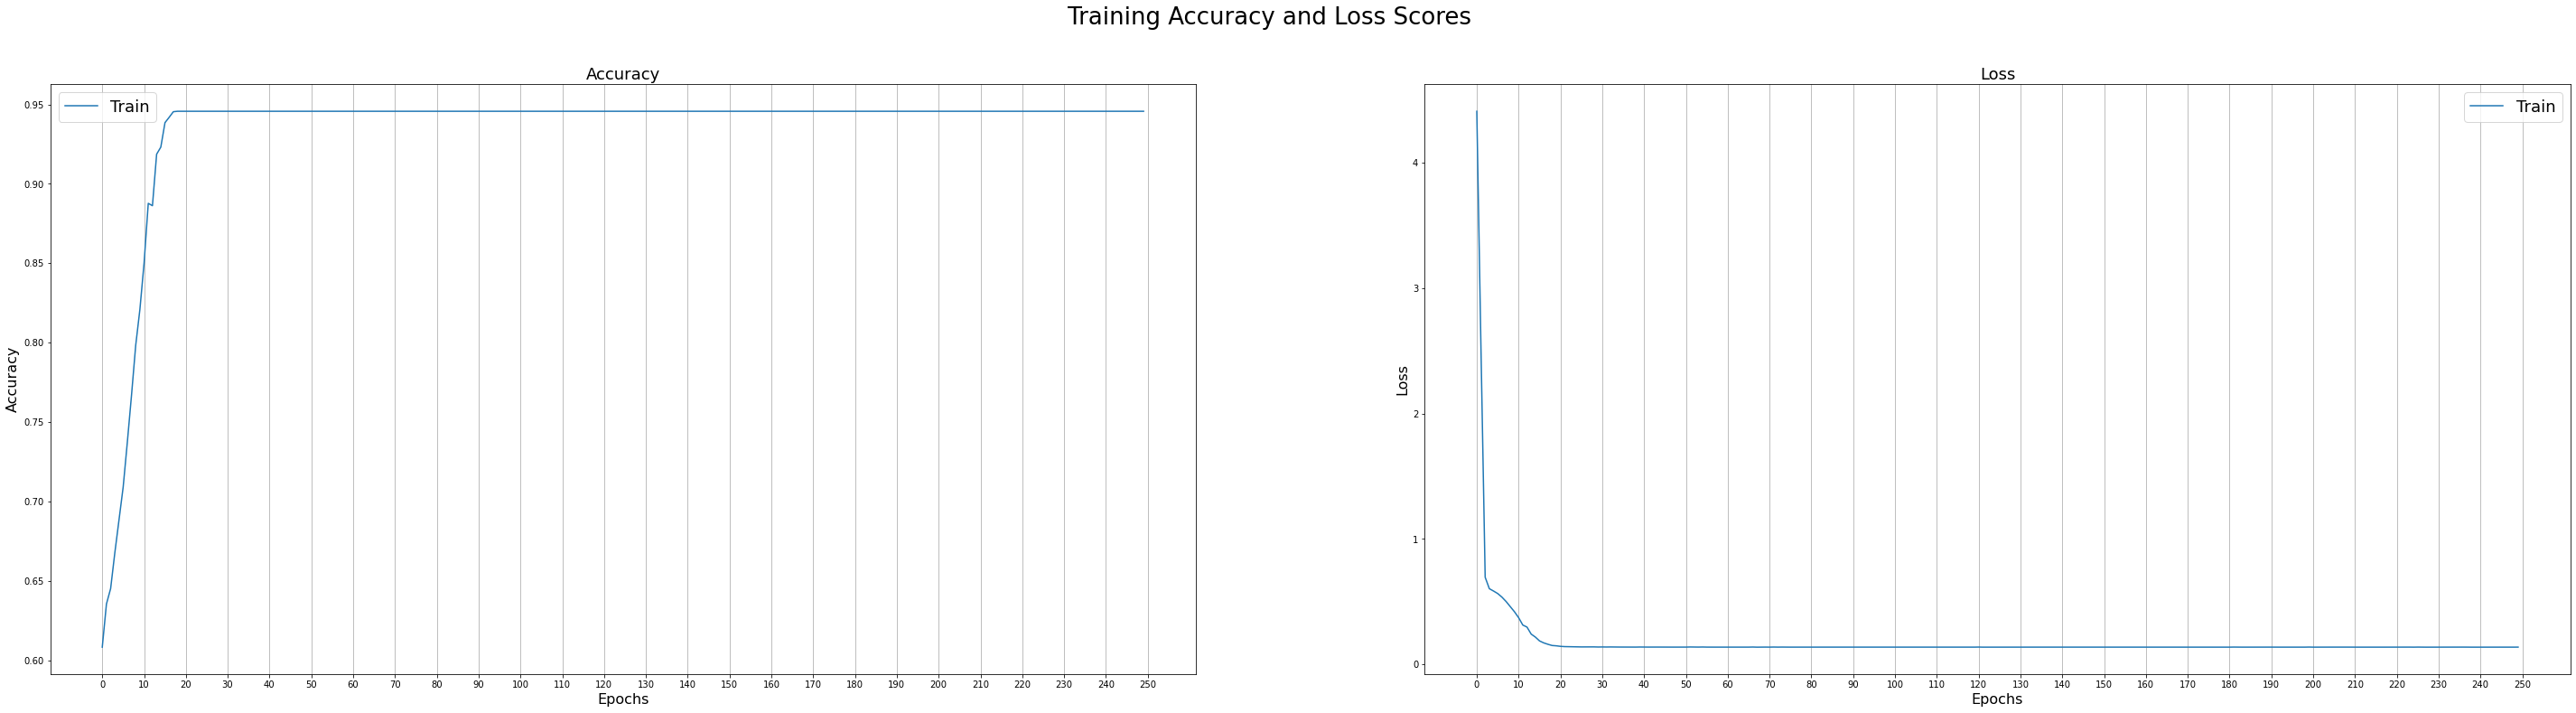

In [12]:
print(model_history.history.keys())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50,12))
fig.suptitle('Training Accuracy and Loss Scores', fontsize = 26)

axes[0].plot(model_history.history['acc'])
# axes[0].plot(model_history.history['val_acc'])
axes[0].set_title('Accuracy', fontsize = 18)
axes[0].set_ylabel('Accuracy', fontsize = 16)
axes[0].set_xlabel('Epochs', fontsize = 16)
axes[0].set_xticks(np.arange(0, 260, step = 10))
axes[0].grid(axis = 'x')
axes[0].legend(['Train', 'Test'], loc = 'best', fontsize = 18)

axes[1].plot(model_history.history['loss'])
# axes[1].plot(model_history.history['val_loss'])
axes[1].set_title('Loss', fontsize = 18)
axes[1].set_ylabel('Loss', fontsize = 16)
axes[1].set_xlabel('Epochs', fontsize = 16)
axes[1].set_xticks(np.arange(0, 260, step = 10))
axes[1].grid(axis = 'x')
axes[1].legend(['Train', 'Test'], loc = 'best', fontsize = 18)

In [13]:
loss, acc = cnn.evaluate(test, ytest, batch_size = 128, verbose = 0)
print(f'Loss = {round(loss, 4)}\tAccuracy = {round(acc, 4)*100}%')

Loss = 2.992	Accuracy = 62.99%


In [60]:
preds = cnn.predict(test)
y_preds = np.argmax(preds, axis = 1)

print('\t Attack\t Normal')
preds[:20]*100

	 Attack	 Normal


array([[ 99.99998,   0.00001],
       [  0.00474,  99.99032],
       [ 99.99941,   0.00001],
       [100.     ,   0.     ],
       [100.     ,   0.     ],
       [  0.     , 100.     ],
       [ 20.73767,  79.41474],
       [ 20.73767,  79.41474],
       [ 20.73767,  79.41474],
       [100.     ,   0.     ],
       [  0.8448 ,  98.8031 ],
       [  8.81538,  81.26327],
       [  0.17258,  99.93524],
       [ 99.47273,   1.45784],
       [  0.3227 ,  98.57411],
       [100.     ,   0.     ],
       [  0.05658,  99.77657],
       [ 99.8027 ,   0.03024],
       [ 18.67053,  60.39744],
       [  7.2627 ,  67.75021]], dtype=float32)

In [61]:
def build_classifier():
    
    cnn = Sequential()

    ## convolution 1
    cnn.add(Conv2D(2**4, (KERNEL_SIZE), padding="same", activation='relu', input_shape = (IMAGE_SIZE)))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    # cnn.add(Dropout(0.5))

    ## convolution 2
    cnn.add(Conv2D(2**5, (KERNEL_SIZE), padding="same", activation='relu'))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    # cnn.add(Dropout(0.5))

    ## convolution 3
    cnn.add(Conv2D(2**6, (KERNEL_SIZE), padding="same", activation='relu'))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    # cnn.add(Dropout(0.5))

    ## convolution 4
    cnn.add(Conv2D(2**7, (KERNEL_SIZE), padding="same", activation='relu'))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    # # cnn.add(Dropout(0.5))
    
    ## convolution 4
#     cnn.add(Conv2D(2**6, (KERNEL_SIZE), padding="same", activation='relu'))
#     cnn.add(MaxPooling2D(pool_size = (2,2)))
    # # cnn.add(Dropout(0.5))

    cnn.add(Flatten())

    ## dense
#     cnn.add(Dense(256, activation='relu'))
    cnn.add(Dense(128, activation='relu'))
#     cnn.add(Dense(128, activation='relu'))
#     cnn.add(Dense(64, activation='relu'))
#     cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation = 'sigmoid'))

    # callback = [EarlyStopping(monitor = 'accuracy', mode = 'max', patience = 2)]

    cnn.compile(optimizer = keras.optimizers.Adam(), loss = 'binary_crossentropy',
                metrics = ['accuracy'])
    
    return cnn

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 128, epochs = 200)

In [63]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, random_state = None)
score = cross_val_score(classifier, test, ytest, cv = kf)
print(f'Model Cross Validation: \n{round(score.mean(), 3)*100}%')
print(f'Model Cross Validation: \n{score}')

os.system('say "cross validation finished"')

Epoch 1/200
329/329 [==============================] - 7s 21ms/step - loss: 3.8590 - acc: 0.5137
Epoch 2/200
329/329 [==============================] - 0s 483us/step - loss: 6.2105 - acc: 0.5167
Epoch 3/200
329/329 [==============================] - 0s 482us/step - loss: 6.2141 - acc: 0.5912
Epoch 4/200
329/329 [==============================] - 0s 483us/step - loss: 6.1334 - acc: 0.5973
Epoch 5/200
329/329 [==============================] - 0s 465us/step - loss: 6.0352 - acc: 0.5988
Epoch 6/200
329/329 [==============================] - 0s 508us/step - loss: 5.9808 - acc: 0.6033
Epoch 7/200
329/329 [==============================] - 0s 476us/step - loss: 5.8016 - acc: 0.6064
Epoch 8/200
329/329 [==============================] - 0s 473us/step - loss: 4.9069 - acc: 0.6748
Epoch 9/200
329/329 [==============================] - 0s 474us/step - loss: 4.9463 - acc: 0.6748
Epoch 10/200
329/329 [==============================] - 0s 475us/step - loss: 4.8982 - acc: 0.6748
Epoch 11/200
329/329

0